<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adding-a-background-map-to-plots" data-toc-modified-id="Adding-a-background-map-to-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Adding a background map to plots</a></span></li></ul></div>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


Adding a background map to plots
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/geopandas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).


In [7]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



In [8]:
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

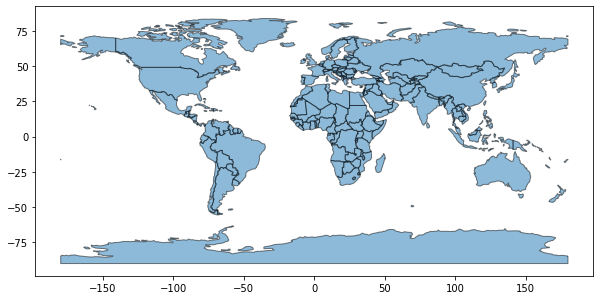

In [12]:
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [13]:
df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


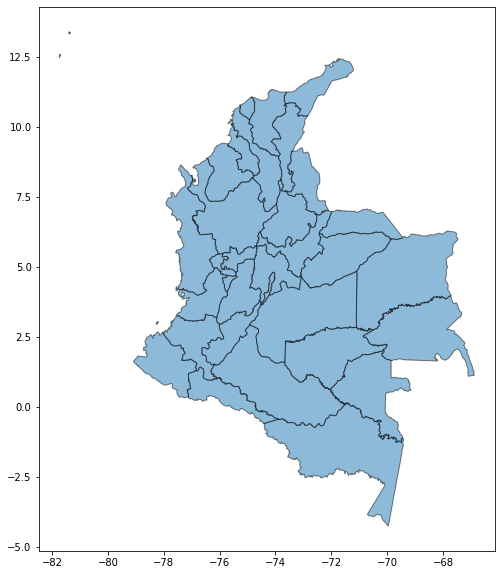

In [16]:
from shapely.geometry import Point, Polygon

colombia= geopandas.read_file('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json')
axcol = colombia.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [17]:
df = df.to_crs(epsg=3857)

In [24]:
col = colombia.to_crs(epsg=3857)

In [19]:
import contextily as ctx

Add background tiles to plot
============================

We can use `add_basemap` function of contextily to easily add a background
map to our plot. :



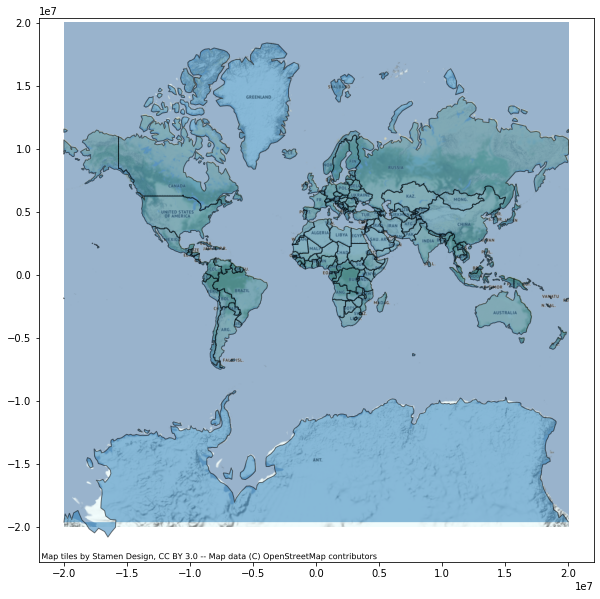

In [20]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.providers``:



/home/isaac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


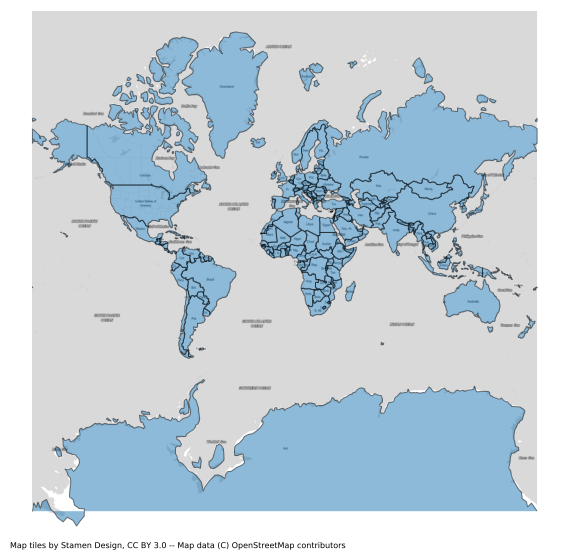

In [22]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

/home/isaac/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


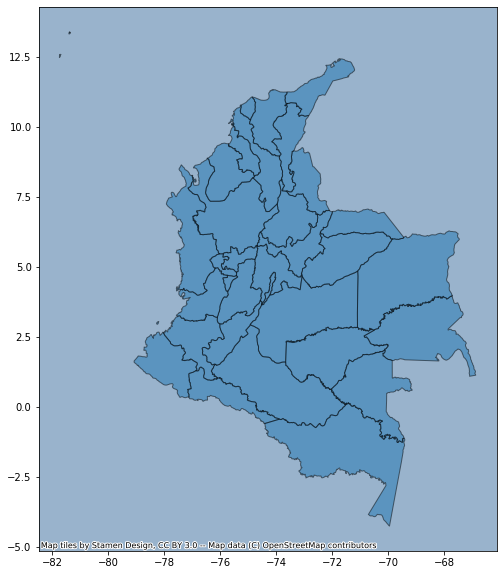

In [26]:
axcol = colombia.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(axcol)